The purpose of this project is to create a machine learning model to predict lithofacies based on well-logs. 
EDA is performed to see if there is any correlation between lithofacies and well-logs parameters. 

In [14]:
#Import necessary libraries 

import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# To Load CSV files 
intellog=pd.read_csv('INTELLOG.csv')
picks=pd.read_csv('PICKS.csv')

In [23]:
intellog.head()

,SitID,Depth,LithID,W_Tar,SW,VSH,PHI,RW
0,102496,437.00,5,0.0,1.0,1.000,0.000,1.054
1,102496,437.25,5,0.0,1.0,0.956,0.016,1.054
2,102496,437.50,5,0.0,1.0,0.776,0.083,1.054
3,102496,437.75,4,0.0,1.0,0.583,0.154,1.054
4,102496,438.00,2,0.0,1.0,0.383,0.228,1.054


In [24]:
intellog.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579846 entries, 0 to 579845
Data columns (total 8 columns):
SitID     579846 non-null int64
Depth     579846 non-null float64
LithID    579846 non-null int64
W_Tar     579846 non-null float64
SW        579846 non-null float64
VSH       579846 non-null float64
PHI       579846 non-null float64
RW        564035 non-null float64
dtypes: float64(6), int64(2)
memory usage: 35.4 MB


As shown, each column in intellog has the right data type. However,RW column have 564,035 rows as compared to 579,846 rows of other columns. 


In [25]:
picks.head()

,SitID,HorID,Depth,Quality
0,102496,1000,321.0,1
1,102496,2000,NaN,-1
2,102496,3000,NaN,-1
3,102496,4000,NaN,-1
4,102496,5000,438.0,2


It's clear that Depth column contains NaN values. So, it's necessary to either remove NaN values or use any other methods to fill in the value.

In this project, it would make more sense to remove these values because 1/ the dataset is large enough. 2/ The information was derived at specific depth, therefore it would not make any sense to use any type of value to fill in the gap. 

In [26]:
picks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30702 entries, 0 to 30701
Data columns (total 4 columns):
SitID      30702 non-null int64
HorID      30702 non-null int64
Depth      20327 non-null float64
Quality    30702 non-null int64
dtypes: float64(1), int64(3)
memory usage: 959.5 KB


In [29]:
# Merge 2 dataframes together by 'SitID' and 'Depth'
main_file=pd.merge(intellog,picks,how='inner',on=['SitID','Depth'])

# Drop NaN values
main_file=main_file.dropna()

main_file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10204 entries, 0 to 10317
Data columns (total 10 columns):
SitID      10204 non-null int64
Depth      10204 non-null float64
LithID     10204 non-null int64
W_Tar      10204 non-null float64
SW         10204 non-null float64
VSH        10204 non-null float64
PHI        10204 non-null float64
RW         10204 non-null float64
HorID      10204 non-null int64
Quality    10204 non-null int64
dtypes: float64(6), int64(4)
memory usage: 876.9 KB


In [34]:
from collections import Counter

counter=Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage= %.2f%%' % (k, v, per))

Class=2, Count=1999, Percentage= 19.59%
Class=4, Count=2898, Percentage= 28.40%
Class=1, Count=1321, Percentage= 12.95%
Class=5, Count=3726, Percentage= 36.52%
Class=3, Count=200, Percentage= 1.96%
Class=0, Count=20, Percentage= 0.20%
Class=6, Count=40, Percentage= 0.39%


As shown, this dataset is highly imbalanced. Class 1,2,4, and 5 are majority classes while class 0,3, and 6 are minority classes. 

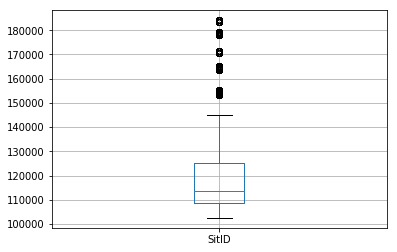

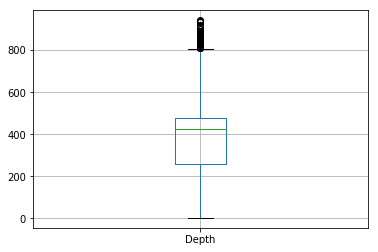

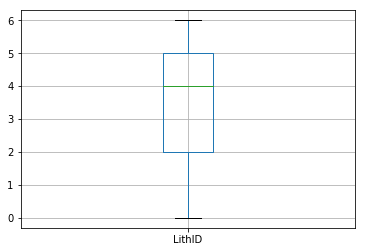

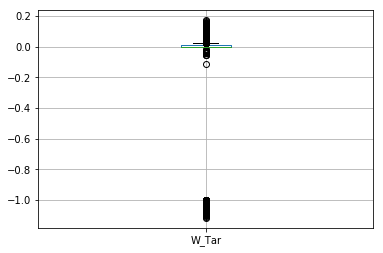

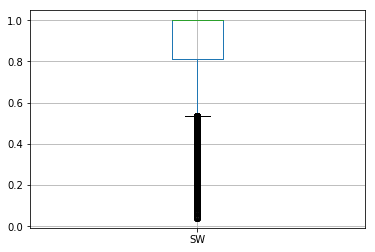

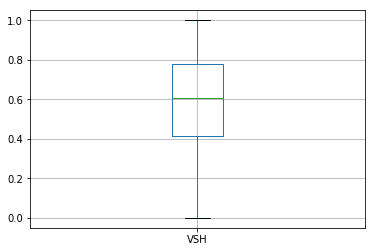

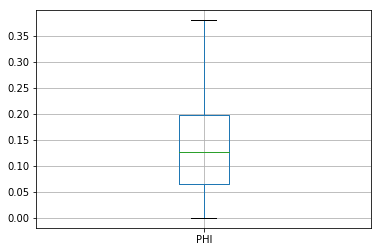

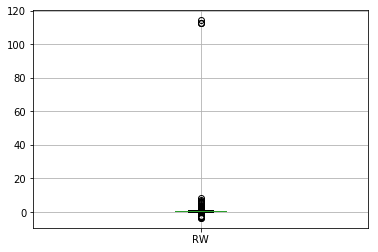

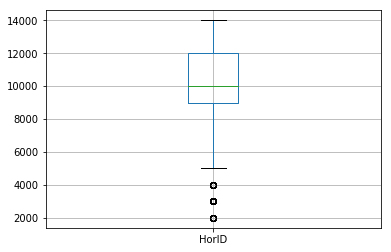

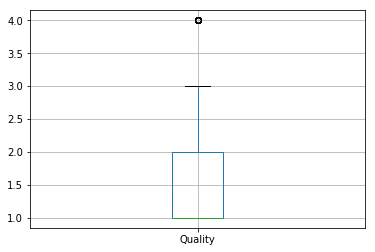

In [30]:
for column in main_file:
    plt.figure()
    main_file.boxplot([column])

The boxplots for each column are constructed to observe their distribution. As shown, most of the parameters have outliers. However, 
for this project, they will be kept. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

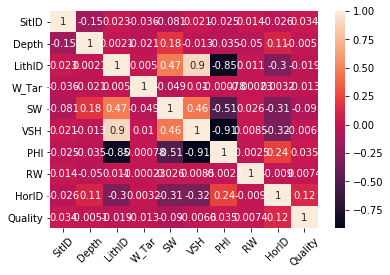

In [31]:
# construct heatmap 
main_file_corr=main_file.corr(method='pearson')
plt.figure()
sns.heatmap(main_file_corr, annot=True)
plt.xticks(rotation=45)    

A correlation heat map is constructed to examine the correlation between features. Several correlations were observed: 
•	Strong correlation between volume of shale and lithology 
•	Strong negative correlation between volume of shale and porosity
•	Strong correlation between porosity and lithology
•	Good correlation between water saturation and volume of shale
•	Good negative correlation between porosity and water saturation

The observable correlation from the heatmap above intrigues to plot these parameters against lithofacies classes. 

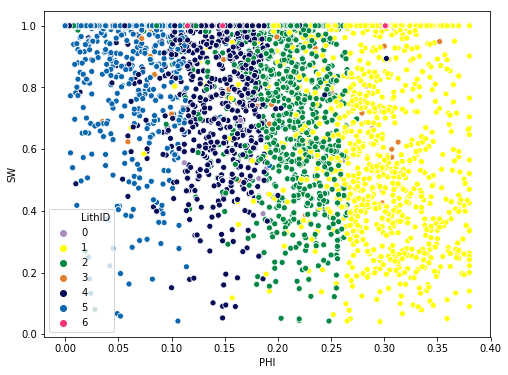

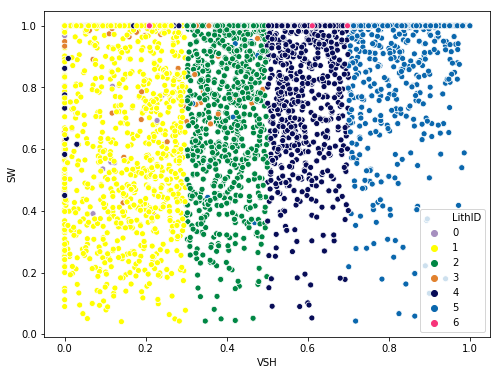

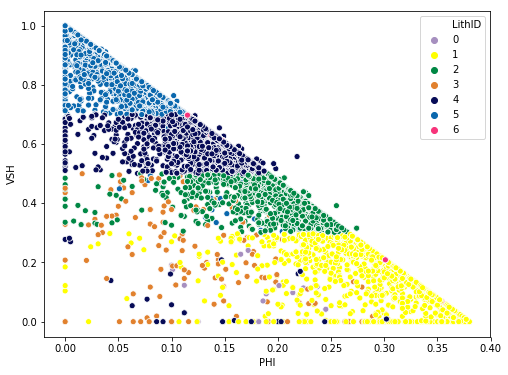

In [33]:
# Create an array with the colors you want to use
colors = ['#A68FBF', '#FFFF00','#008744','#E1812E','#070C57','#0A67AD','#F7347A']
# Set your custom color palette
customPalette=sns.set_palette(sns.color_palette('RdBu',n_colors=7))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.scatterplot(data['PHI'],data['SW'],hue=data['LithID'],palette=sns.color_palette(colors,7))


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.scatterplot(data['VSH'],data['SW'],hue=data['LithID'],palette=sns.color_palette(colors,7))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.scatterplot(data['PHI'],data['VSH'],hue=data['LithID'],palette=sns.color_palette(colors,7))

In [ ]:
From these plots above, lithology classes 1,2,4, and 5 are distinct clusters that the machine learning model can classify
them correctly. Nevertheless, lithology class 0,3 and 6 are mixed into other classes as expected because the rock that belong
to these classes have very similar properties with class 1,2,4 and 5. Furthermore, the proportion of samples for class 0,3 and
6 are significantly smaller than the proportion for other classes. Therefore, it will be challenging for the model to have good
performance to predict the class 0,3 and 6 correctly.